# 树回归
简单的线性回归是一种构建全局模型的想法，面对非线性的数据将束手无策。
我们将数据切分为多份易建模的数据，再进行回归。
所以树回归 = 决策树 + 回归分析

CART（Classification And Regression Tree）分类回归树，既用于分类，还用于回归。


决策树算法
* ID3 (Iterative Dichotomister,迭代二分法)，每次选取最佳的特征分隔，并按该特征的所有取值切分。所以无法区分连续型数据，只能转换为连续型。
* 二元切分法 优化ID3算法，特征值小于给定值就走左子树，大于就走右子树，易于处理连续型数据。

## 回归树的构建

伪代码

    找到最佳的特征分割：
        如果该节点无法再分，则保存为叶节点返回
        执行二元切分
        左子树调用构造方法 
        右子树调用构造方法
## 特征值的选取

伪代码

    对每个特征
        对每个特征值
            将数据预分成两份
            计算切分后的误差
            如果此误差小于当前最小误差，则更新误差和切分记录
    返回最佳切分特征和特征值

In [1]:
import numpy as np
def load_data(filename):
    data_mat = []
    fr = open(filename)
    for line in fr.readlines():
        cur_line = line.strip().split('\t')
        flt_line = list(map(float, cur_line))
        data_mat.append(flt_line)
    return data_mat

In [2]:
mydata = np.mat(load_data('ex00.txt'))

In [3]:
mydata

matrix([[ 3.609800e-02,  1.550960e-01],
        [ 9.933490e-01,  1.077553e+00],
        [ 5.308970e-01,  8.934620e-01],
        [ 7.123860e-01,  5.648580e-01],
        [ 3.435540e-01, -3.717000e-01],
        [ 9.801600e-02, -3.327600e-01],
        [ 6.911150e-01,  8.343910e-01],
        [ 9.135800e-02,  9.993500e-02],
        [ 7.270980e-01,  1.000567e+00],
        [ 9.519490e-01,  9.452550e-01],
        [ 7.685960e-01,  7.602190e-01],
        [ 5.413140e-01,  8.937480e-01],
        [ 1.463660e-01,  3.428300e-02],
        [ 6.731950e-01,  9.150770e-01],
        [ 1.835100e-01,  1.848430e-01],
        [ 3.395630e-01,  2.067830e-01],
        [ 5.179210e-01,  1.493586e+00],
        [ 7.037550e-01,  1.101678e+00],
        [ 8.307000e-03,  6.997600e-02],
        [ 2.439090e-01, -2.946700e-02],
        [ 3.069640e-01, -1.773210e-01],
        [ 3.649200e-02,  4.081550e-01],
        [ 2.955110e-01,  2.882000e-03],
        [ 8.375220e-01,  1.229373e+00],
        [ 2.020540e-01, -8.774400e-02],


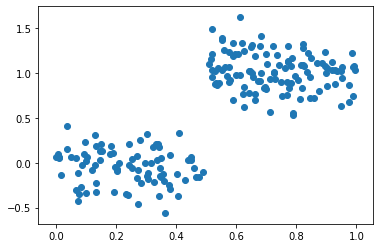

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(mydata[:, 0].T.A[0], mydata[:, 1].T.A[0])

In [5]:
def bin_split(dataset, feature, value):
    mat0 = dataset[np.nonzero(dataset[:,feature] > value)[0],:]
    mat1 = dataset[np.nonzero(dataset[:,feature] <= value)[0],:]
    return mat0,mat1

def reg_leaf(dataset):#returns the value used for each leaf
    return np.mean(dataset[:,-1])

def reg_err(dataset):
    return np.var(dataset[:,-1]) * np.shape(dataset)[0]

def choose_best_split(dataset, leaf_type=reg_leaf, err_type=reg_err, ops=(1,4)):
    tol_s = ops[0]; tol_n = ops[1]
    if len(set(dataset[:,-1].T.tolist()[0])) == 1: 
        return None, leaf_type(dataset)
    m,n = np.shape(dataset)
    s = err_type(dataset)
    best_s = np.inf; best_index = 0; best_value = 0
    for feat_index in range(n-1):
        for split_val in set(dataset[:,feat_index].T.tolist()[0]):
            mat0, mat1 = bin_split(dataset, feat_index, split_val)
            if (np.shape(mat0)[0] < tol_n) or (np.shape(mat1)[0] < tol_n): continue
            new_s = err_type(mat0) + err_type(mat1)
            if new_s < best_s: 
                best_index = feat_index
                best_value = split_val
                best_s = new_s
    if (s - best_s) < tol_s: 
        return None, leaf_type(dataset)
    mat0, mat1 = bin_split(dataset, best_index, best_value)
    if (np.shape(mat0)[0] < tol_n) or (np.shape(mat1)[0] < tol_n):  
        return None, leaf_type(dataset)
    return best_index,best_value

def create_tree(dataset, leaf_type=reg_leaf, err_type=reg_err, ops=(1,4)):
    feat, val = choose_best_split(dataset, leaf_type, err_type, ops)
    if feat == None: return val 
    ret_tree = {}
    ret_tree['index'] = feat
    ret_tree['value'] = val
    lset, rset = bin_split(dataset, feat, val)
    ret_tree['left'] = create_tree(lset, leaf_type, err_type, ops)
    ret_tree['right'] = create_tree(rset, leaf_type, err_type, ops)
    return ret_tree  

In [6]:
create_tree(mydata)

{'index': 0,
 'value': 0.48813,
 'left': 1.0180967672413792,
 'right': -0.04465028571428572}

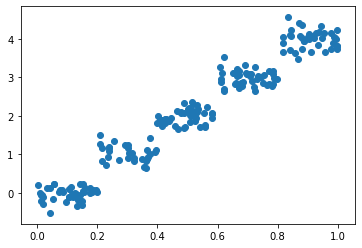

In [7]:
mydata = np.mat(load_data('ex0.txt'))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(mydata[:, 1].T.A[0], mydata[:, 2].T.A[0])

In [8]:
create_tree(mydata)

{'index': 1,
 'value': 0.39435,
 'left': {'index': 1,
  'value': 0.582002,
  'left': {'index': 1,
   'value': 0.797583,
   'left': 3.9871632,
   'right': 2.9836209534883724},
  'right': 1.980035071428571},
 'right': {'index': 1,
  'value': 0.197834,
  'left': 1.0289583666666666,
  'right': -0.023838155555555553}}

## 树剪枝
后剪枝伪代码：

    基于已有的树：
        如果子集是子树，则递归剪枝
        计算两个叶子节点合并后的误差
        计算不合并的误差
        如果合并降低误差，则更新

In [9]:
def is_tree(obj):
    return isinstance(obj, dict)

def get_mean(tree):
    if is_tree(tree['right']):
        tree['right'] = get_mean(tree['right'])
    if is_tree(tree['left']):
        tree['left'] = get_mean(tree['left'])
    return (tree['left'] + tree['right']) / 2.0

def prune(tree, testdata):
    if np.shape(testdata)[0] == 0:
        return get_mean(tree)
    if (is_tree(tree['right'])) or (is_tree(tree['left'])):
        lset, rset = bin_split(testdata, tree['index'], tree['value'])
    if is_tree(tree['left']):
        tree['left'] = prune(tree['left'], lset)
    if is_tree(tree['right']):
        tree['right'] = prune(tree['right'], rset)
    if not is_tree(tree['left']) and not is_tree(tree['right']):
        lset, rset = bin_split(testdata, tree['index'], tree['value'])
        err_no_merge = sum(np.power(lset[:, -1] - tree['left'], 2)) + sum(np.power(rset[:, -1] - tree['right'], 2))
        tree_mean = (tree['left'] + tree['right']) / 2.0
        err_merge = sum(np.power(testdata[:, -1] - tree_mean, 2))
        if err_merge < err_no_merge:
            print('merging')
            return tree_mean
        else:
            return tree
    else:
        return tree
    
def prune(tree, testData):
    if np.shape(testData)[0] == 0: return get_mean(tree) #if we have no test data collapse the tree
    if (is_tree(tree['right']) or is_tree(tree['left'])):#if the branches are not trees try to prune them
        lSet, rSet = bin_split(testData, tree['index'], tree['value'])
    if is_tree(tree['left']): tree['left'] = prune(tree['left'], lSet)
    if is_tree(tree['right']): tree['right'] =  prune(tree['right'], rSet)
    #if they are now both leafs, see if we can merge them
    if not is_tree(tree['left']) and not is_tree(tree['right']):
        lSet, rSet = bin_split(testData, tree['index'], tree['value'])
        errorNoMerge = sum(np.power(lSet[:,-1] - tree['left'],2)) +\
            sum(np.power(rSet[:,-1] - tree['right'],2))
        treeMean = (tree['left']+tree['right'])/2.0
        errorMerge = sum(np.power(testData[:,-1] - treeMean,2))
        if errorMerge < errorNoMerge: 
            print("merging")
            return treeMean
        else: return tree
    else: return tree

In [10]:
mymat = np.mat(load_data('ex00.txt'))
mytree = create_tree(mymat, ops=(0,1))
mytest = np.mat(load_data('ex2test.txt'))
prune(mytree, mytest)

merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging
merging


{'index': 0,
 'value': 0.48813,
 'left': {'index': 0,
  'value': 0.620599,
  'left': {'index': 0,
   'value': 0.625336,
   'left': {'index': 0,
    'value': 0.625791,
    'left': {'index': 0,
     'value': 0.643601,
     'left': {'index': 0,
      'value': 0.651376,
      'left': {'index': 0,
       'value': 0.6632,
       'left': {'index': 0,
        'value': 0.683921,
        'left': {'index': 0,
         'value': 0.819823,
         'left': {'index': 0,
          'value': 0.837522,
          'left': {'index': 0,
           'value': 0.846455,
           'left': {'index': 0,
            'value': 0.919384,
            'left': {'index': 0,
             'value': 0.976414,
             'left': {'index': 0,
              'value': 0.985425,
              'left': {'index': 0,
               'value': 0.989888,
               'left': 1.056543,
               'right': {'index': 0,
                'value': 0.988852,
                'left': 0.744207,
                'right': 1.069062}},
          

In [11]:
def linearSolve(dataSet):   #helper function used in two places
    m,n = shape(dataSet)
    X = mat(ones((m,n))); Y = mat(ones((m,1)))#create a copy of data with 1 in 0th postion
    X[:,1:n] = dataSet[:,0:n-1]; Y = dataSet[:,-1]#and strip out Y
    xTx = X.T*X
    if linalg.det(xTx) == 0.0:
        raise NameError('This matrix is singular, cannot do inverse,\n\
        try increasing the second value of ops')
    ws = xTx.I * (X.T * Y)
    return ws,X,Y

def modelLeaf(dataSet):#create linear model and return coeficients
    ws,X,Y = linearSolve(dataSet)
    return ws

def modelErr(dataSet):
    ws,X,Y = linearSolve(dataSet)
    yHat = X * ws
    return sum(power(Y - yHat,2))